## Regresión Logistica
Caso de estudio para establecer un modelo que permita calcular la probabilidad de obtener matrícula de honor alfinal del bachillerato en  funcion de la nota que se ha obtenido en matematicas.
*0* representa que no se tiene la matricula, *1* si tiene la matricula.

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Datos
# ==============================================================================
matricula = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                     0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
                     0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                     1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                     1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
                     1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
                     0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                     0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

matematicas = np.array([
                  41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,
                  51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
                  63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,
                  63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
                  50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,
                  57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
                  72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,
                  57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
                  56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,
                  58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
                  53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,
                  63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
                  53, 42, 60, 52, 38, 57, 58, 65])

datos = pd.DataFrame({'matricula': matricula, 'matematicas': matematicas})
datos.head(3)

,matricula,matematicas
0,0,41
1,0,53
2,0,54


In [3]:
# Número de obsercaciones por clase
# ==============================================================================
datos.matricula.value_counts().sort_index()

0    151
1     49
Name: matricula, dtype: int64

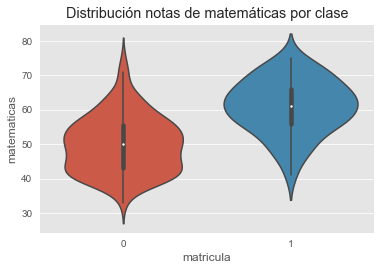

In [4]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'matricula',
        y     = 'matematicas',
        data  = datos,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución notas de matemáticas por clase');

In [5]:
# T-test entre clases
# ==============================================================================
res_ttest = ttest_ind(
                x1 = matematicas[matricula == 0],
                x2 = matematicas[matricula == 1],
                alternative='two-sided'
            )
print(f"t={res_ttest[0]}, p-value={res_ttest[1]}")

t=-8.245421127756739, p-value=2.248243794123437e-14


#### Ajuste del modelo usando Scikit-learn

In [6]:
# División de los datos en train y test
# ==============================================================================
X = datos[['matematicas']]
y = datos['matricula']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
modelo = LogisticRegression(penalty='none')
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LogisticRegression(penalty='none')

In [7]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X, y))

Intercept: [-8.98479044]
Coeficiente: [('matematicas', 0.14393266992917014)]
Accuracy de entrenamiento: 0.81


In [8]:
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = modelo.predict_proba(X = X_test)
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)
predicciones.head(3)

,0,1
0,0.685816,0.314184
1,0.838109,0.161891
2,0.443517,0.556483


In [9]:
# Predicciones con clasificación final
# ==============================================================================
# Con .predict() se obtiene, para cada observación, la clasificación predicha por
# el modelo. Esta clasificación se corresponde con la clase con mayor probabilidad.
predicciones = modelo.predict(X = X_test)
predicciones

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
test_accuracy = accuracy_score(y_test, predicciones)
test_accuracy

0.875

#### Ajuste Usando Statsmodels
La ventaja de la paquetería **statsmodels**, es que esta además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos.

**Statsmodels** tiene dos formas de entrenar el modelo:
* Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en *R*.
* Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por **Scikitlearn** con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [10]:
# División de los datos en train y test
# ==============================================================================
X = datos[['matematicas']]
y = datos['matricula']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [11]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(np.hstack((X_train, y_train)),
#                            columns=['matematicas', 'matricula'])
# modelo = smf.logit(formula = 'matricula ~matematicas', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

In [12]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.451215
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  160
Model:                          Logit   Df Residuals:                      158
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.2247
Time:                        09:55:39   Log-Likelihood:                -72.194
converged:                       True   LL-Null:                       -93.122
Covariance Type:            nonrobust   LLR p-value:                 9.831e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9848      1.543     -5.821      0.000     -12.010      -5.960
x1             0.1439      0.